In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
train=pd.read_csv('sign_mnist_test.csv')
test=pd.read_csv('sign_mnist_train.csv')

In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138.0,148.0,127.0,89.0,82.0,96.0,106.0,112.0,120.0,107.0
1,5,126,128,131,132,133,134,135,135,136,...,47.0,104.0,194.0,183.0,186.0,184.0,184.0,184.0,182.0,180.0
2,10,85,88,92,96,105,123,135,143,147,...,68.0,166.0,242.0,227.0,230.0,227.0,226.0,225.0,224.0,222.0
3,0,203,205,207,206,207,209,210,209,210,...,154.0,248.0,247.0,248.0,253.0,236.0,230.0,240.0,253.0,255.0
4,3,188,191,193,195,199,201,202,203,203,...,26.0,40.0,64.0,48.0,29.0,46.0,49.0,46.0,46.0,53.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Columns: 785 entries, label to pixel784
dtypes: float64(190), int64(595)
memory usage: 8.3 MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726 entries, 0 to 1725
Columns: 785 entries, label to pixel784
dtypes: float64(81), int64(704)
memory usage: 10.3 MB


In [7]:
train.shape

(1379, 785)

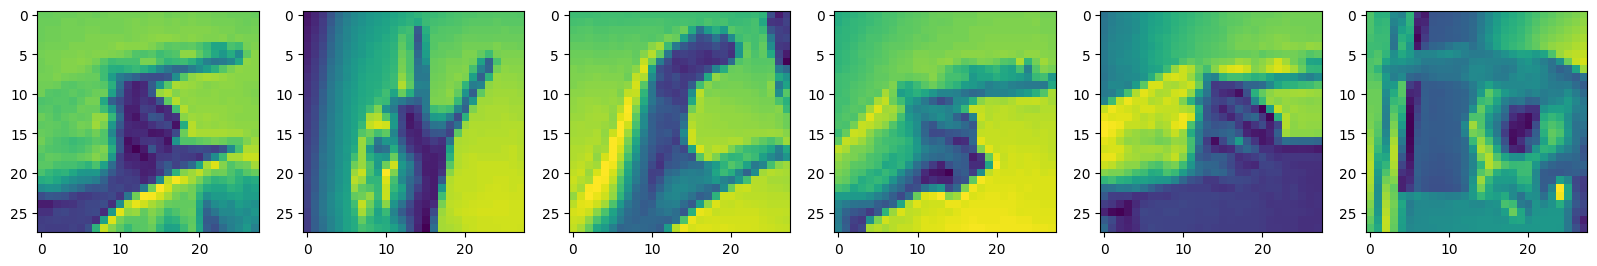

In [10]:
f=plt.figure(figsize=(20,6))
ax=f.add_subplot(161)
ax2=f.add_subplot(162)
ax3=f.add_subplot(163)
ax4=f.add_subplot(164)
ax5=f.add_subplot(165)
ax6=f.add_subplot(166)
ax.imshow(train.iloc[0].values[1:].reshape(28,28))
ax2.imshow(train.iloc[5].values[1:].reshape(28,28))
ax3.imshow(train.iloc[20].values[1:].reshape(28,28))
ax4.imshow(train.iloc[456].values[1:].reshape(28,28))
ax5.imshow(train.iloc[999].values[1:].reshape(28,28))
ax6.imshow(train.iloc[1300].values[1:].reshape(28,28))

plt.show()

<Axes: ylabel='count'>

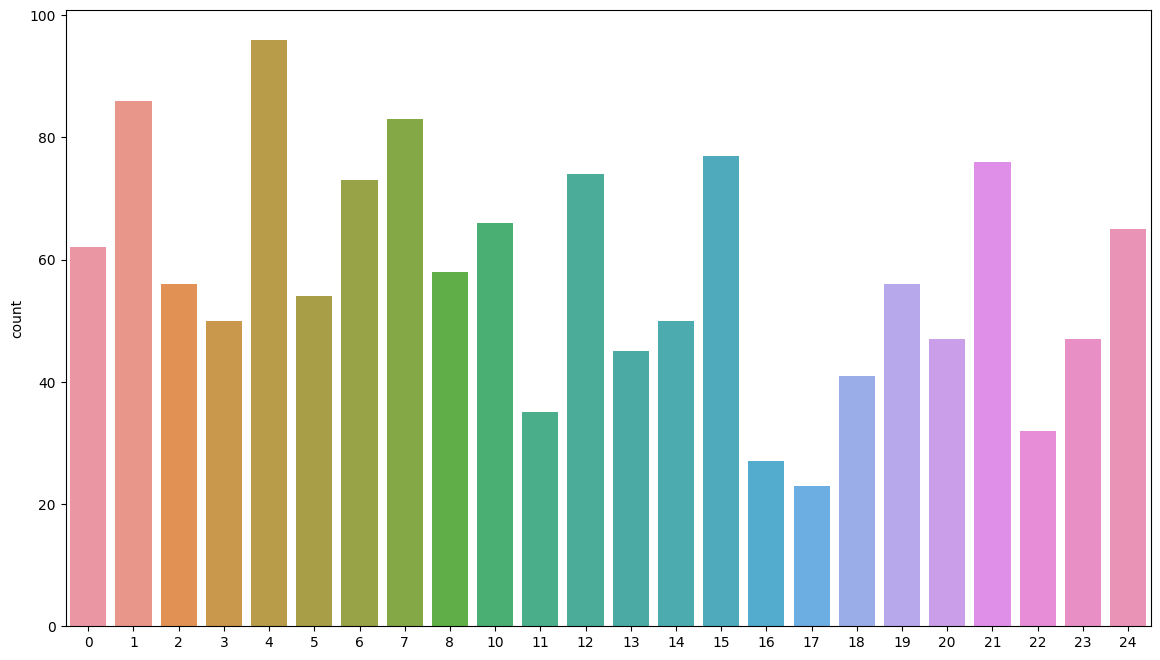

In [11]:
labels = train['label'].values
plt.figure(figsize = (14,8))
sns.countplot(x =labels)

In [12]:
X_train = train.drop(["label"],axis=1)
X_test = test.drop(["label"],axis=1)
Y_train = train['label']
Y_test = test['label']
del train['label']
del test['label']


In [13]:
X_train = X_train/255.0
X_test = X_test/255.0
X_train.shape
X_test.shape

(1726, 784)

In [14]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
X_train.shape
X_test.shape

(1726, 28, 28, 1)

In [15]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
Y_train = label_binrizer.fit_transform(Y_train)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (1103, 28, 28, 1)
x_test shape (276, 28, 28, 1)
y_train shape (1103, 24)
y_test shape (276, 24)


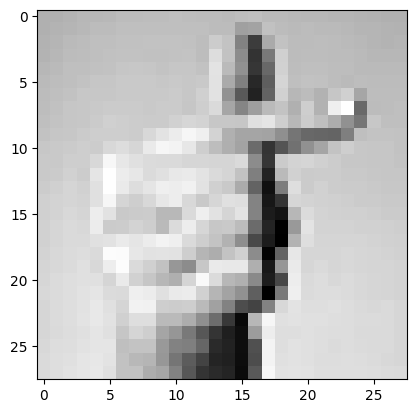

In [17]:
plt.imshow(X_train[10][:,:,0],cmap="gray")
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding = 'same', input_shape=(28, 28, 1)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(128, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        
                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(512, activation='relu'),
                        tf.keras.layers.Dense(24, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 512)         590336    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 512)        0

In [19]:
model.compile( optimizer='rmsprop' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [20]:
epochs = 50 
batch_size = 200

In [21]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False,
        rotation_range=15, 
        zoom_range = 0.5,
        width_shift_range=0.15,  
        height_shift_range=0.15, 
        horizontal_flip=True,  
        vertical_flip=False)  

datagen.fit(X_train)

In [22]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)


<ipython-input-22-6f14273d6fe3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)


Epoch 1/50
5/5 [==============================] - 23s 3s/step - loss: 3.2073 - accuracy: 0.0443 - val_loss: nan - val_accuracy: 0.0761
Epoch 2/50
5/5 [==============================] - 17s 4s/step - loss: 3.1522 - accuracy: 0.0520 - val_loss: nan - val_accuracy: 0.0435
Epoch 3/50
5/5 [==============================] - 16s 3s/step - loss: 3.1481 - accuracy: 0.0631 - val_loss: nan - val_accuracy: 0.0942
Epoch 4/50
5/5 [==============================] - 17s 4s/step - loss: 3.1433 - accuracy: 0.0530 - val_loss: nan - val_accuracy: 0.0942
Epoch 5/50
5/5 [==============================] - 16s 3s/step - loss: 3.1286 - accuracy: 0.0642 - val_loss: nan - val_accuracy: 0.0435
Epoch 6/50
5/5 [==============================] - 16s 4s/step - loss: 3.1409 - accuracy: 0.0676 - val_loss: nan - val_accuracy: 0.0435
Epoch 7/50
5/5 [==============================] - 17s 3s/step - loss: 3.1296 - accuracy: 0.0520 - val_loss: nan - val_accuracy: 0.0471
Epoch 8/50
5/5 [==============================] - 16s 3

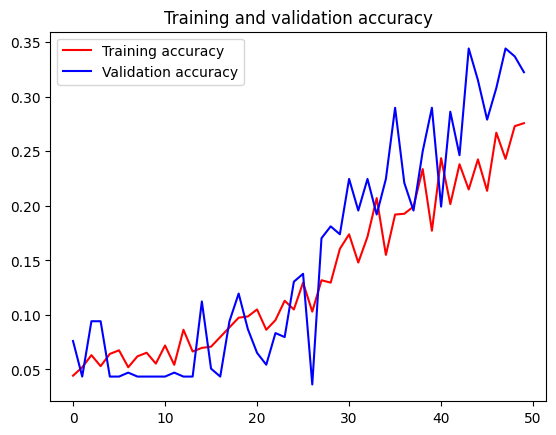

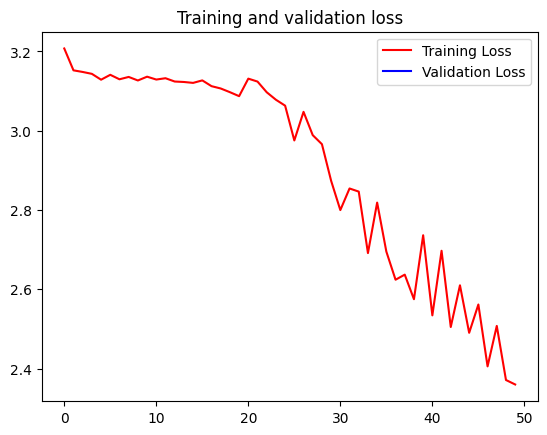

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()